In [68]:
#import libraries
import pandas as pd_zeeshanali # for creating data fames
import numpy as np_zeeshanali # for numerical analysis
import matplotlib.pyplot as plt_zeeshanali # for graphical representation of the data
from sklearn import linear_model # required model import from sklearn library
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [69]:
# load dataset
df_zeeshanali = pd_zeeshanali.read_csv("D:\dataset.csv")
df_zeeshanali

,Rented_SqFt,Percent_Office Space,Year_Built,Clear_Height,Truck_High_Doors,Ground_Level_Doors,Date_of_Lease,Monthly_Rent
0,796,8.876993,1974,20.0,0,1,14-08-75,11200
1,500,5.576001,1975,20.5,0,1,15-07-75,8500
2,450,5.018401,1976,21.0,0,2,22-07-77,9500
3,650,7.248801,1977,20.0,0,2,29-03-78,10200
4,352,3.925505,1978,22.0,0,3,27-08-79,10100
5,400,4.460801,1979,21.5,0,1,26-06-81,9540
6,380,4.237761,1980,20.5,0,2,29-08-82,9800
7,450,5.018401,1981,20.0,0,2,19-08-83,8800
8,600,6.691201,1982,21.0,0,3,31-07-84,8700
9,500,5.576001,1983,22.0,0,2,28-06-85,8900


<AxesSubplot:>

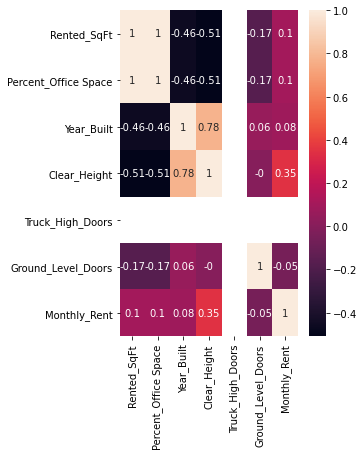

In [70]:
# we create a correlation matrix that measures the linear relationships between the variables.
# The correlation matrix can be formed by using the corr function from the pandas dataframe library.
# We will use the heatmap function from the seaborn library to plot the correlation matrix.

correlation_matrix = df_zeeshanali.corr().round(2)

plt_zeeshanali.figure(figsize=(4, 6)) #increase the heatmap display size

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [71]:
# create multiple linear regression model

reg = linear_model.LinearRegression()


In [72]:
reg.fit(df_zeeshanali[['Clear_Height','Rented_SqFt','Year_Built']],df_zeeshanali.Monthly_Rent)

# i choose Rented SqFt becuase the coorelation with MonthlyRent (target variable) is 0.51 (Positive, Weak Correlation)
# i choose Year Built becuase the coorelation with MonthlyRent (target variable) is 0.78 (Positive, Strong Correlation)
# i choose Clear Height becuase the coorelation with MonthlyRent (target variable) is 0.35 (Positive, weak Correlation)

LinearRegression()

In [73]:
reg.coef_

array([501.12616828,   2.49597032, -66.39158288])

In [74]:
reg.intercept_

129202.322482063

In [76]:
reg.predict(df_zeeshanali[['Clear_Height','Rented_SqFt','Year_Built']])

array([10154.65361033,  9600.01789813,  9659.3908836 ,  9591.06719559,
        9783.12879518,  9585.98070331,  8968.54354584,  8826.30680092,
        9635.43693367,  9820.5744875 , 10292.74862763, 10415.48692356,
       10173.41136601,  9668.29287274,  9727.66585821, 10575.20159827,
        9206.07518838,  9565.9306643 ,  9760.08604682])

In [77]:
RentedSqFt_zeeshanali= 2.49597032
ClearHeight_zeeshanali= 5.09478794
YearBuilt_zeeshanali= -66.39158288

MonthlyRent_zeeshanali = 700 * RentedSqFt_zeeshanali + 10 * ClearHeight_zeeshanali + 1998 * YearBuilt_zeeshanali + reg.intercept_


In [81]:
X = df_zeeshanali[['Clear_Height', 'Rented_SqFt']]
y = df_zeeshanali['Monthly_Rent']
df_zeeshanali.head()

,Rented_SqFt,Percent_Office Space,Year_Built,Clear_Height,Truck_High_Doors,Ground_Level_Doors,Date_of_Lease,Monthly_Rent
0,796,8.876993,1974,20.0,0,1,14-08-75,11200
1,500,5.576001,1975,20.5,0,1,15-07-75,8500
2,450,5.018401,1976,21.0,0,2,22-07-77,9500
3,650,7.248801,1977,20.0,0,2,29-03-78,10200
4,352,3.925505,1978,22.0,0,3,27-08-79,10100


In [83]:
X = df_zeeshanali[['Clear_Height', 'Rented_SqFt']]
y = df_zeeshanali['Monthly_Rent']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

C:\Users\ZeeshanAli\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Monthly_Rent   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     2.276
Date:                Tue, 04 Jan 2022   Prob (F-statistic):              0.135
Time:                        17:07:11   Log-Likelihood:                -151.65
No. Observations:                  19   AIC:                             309.3
Df Residuals:                      16   BIC:                             312.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1651.6913   3793.995      0.435      0.669   -6391.219    9694.602
Clear_Height   307.7540    147.478      2.087      0.053      -4.885     620.393
Rented_SqFt      2.8037      1.951      1.437      0.170      -1.332       6.939
==============================================================================
Omnibus:                        0.797   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.777
Skew:                          -0.288   Prob(JB):                        0.678
Kurtosis:                       2.195   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""